In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import itertools
import sys
sys.path.append('../machine_learning')
from utils import continuous_variables
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
df

,highest_elevation_m,area_m2,sub_buildings,graffiti_count,one_house_away_buildings_count,one_house_away_graffiti_count,one_house_away_graffiti_average,one_house_away_graffiti_buildings,one_house_away_buildings_average_height,one_house_away_buildings_median_height,...,geo_local_area_area_m2,geo_local_area_population,pop_density,roof_type_Complex,roof_type_Flat,roof_type_Pitched,street_type_arterial,street_type_collector,street_type_residential,street_type_secondary_arterial
0,56.17,4457.030151,11,2.0,0,0.0,0.0,0,0.000,0.000,...,8330704.78,34575,0.00415,0,1,0,1,0,0,0
1,56.17,4457.030151,11,0.0,2,7.0,3.5,1,56.170,56.170,...,8330704.78,34575,0.00415,0,1,0,1,0,0,0
2,56.17,4457.030151,11,0.0,1,0.0,0.0,0,56.170,56.170,...,8330704.78,34575,0.00415,0,1,0,1,0,0,0
3,56.17,4457.030151,11,7.0,2,7.0,3.5,1,56.170,56.170,...,8330704.78,34575,0.00415,0,1,0,1,0,0,0
4,56.17,4457.030151,11,4.0,2,9.0,4.5,2,56.170,56.170,...,8330704.78,34575,0.00415,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72960,118.09,71.319601,1,0.0,2,0.0,0.0,0,117.065,117.065,...,6932819.53,29325,0.00423,0,0,1,0,0,1,0
72961,114.47,209.131803,1,0.0,1,0.0,0.0,0,115.760,115.760,...,6932819.53,29325,0.00423,0,1,0,0,0,1,0
72962,114.91,105.641870,1,0.0,1,0.0,0.0,0,114.660,114.660,...,6932819.53,29325,0.00423,0,1,0,0,0,1,0
72963,115.32,146.877902,1,0.0,1,0.0,0.0,0,115.220,115.220,...,6932819.53,29325,0.00423,0,1,0,0,0,1,0


In [2]:
df.describe()

,highest_elevation_m,area_m2,sub_buildings,graffiti_count,one_house_away_buildings_count,one_house_away_graffiti_count,one_house_away_graffiti_average,one_house_away_graffiti_buildings,one_house_away_buildings_average_height,one_house_away_buildings_median_height,...,geo_local_area_area_m2,geo_local_area_population,pop_density,roof_type_Complex,roof_type_Flat,roof_type_Pitched,street_type_arterial,street_type_collector,street_type_residential,street_type_secondary_arterial
count,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,...,7.296500e+04,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000,72965.000000
mean,66.727853,412.579616,1.538313,0.266854,1.702090,0.501309,0.209417,0.138998,57.678872,57.679875,...,6.236873e+06,32446.070719,0.005415,0.030604,0.260495,0.708902,0.113136,0.016857,0.808045,0.061961
std,27.058351,1105.285292,2.207427,1.349707,1.089791,3.048547,1.128608,0.570316,34.197706,34.198015,...,1.707705e+06,13595.907825,0.002748,0.172243,0.438908,0.454272,0.316762,0.128738,0.393841,0.241087
min,4.790000,25.331665,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.175940e+06,7970.000000,0.001882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,101.252780,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.050000,32.050000,...,4.930726e+06,22555.000000,0.004075,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,67.150000,133.367433,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,60.810000,60.815000,...,6.361709e+06,32955.000000,0.005552,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,89.520000,183.245091,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,86.233333,86.240000,...,7.251126e+06,43045.000000,0.006363,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,223.710000,54227.841295,60.000000,35.000000,7.000000,83.000000,35.000000,7.000000,223.710000,223.710000,...,9.078142e+06,62030.000000,0.020924,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
y = df['graffiti_count']
x = set(df.columns)
x.remove('graffiti_count')
x = list(x)


singular_variables = ' + '.join(x)
formula = "graffiti_count ~ " + singular_variables

fit = smf.ols(formula, data=df).fit()

summary = fit.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         graffiti_count   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     2720.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:45:07   Log-Likelihood:                -91559.
No. Observations:               72965   AIC:                         1.832e+05
Df Residuals:                   72923   BIC:                         1.836e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            0.0949      0.017      5.467      0.000       0.061       0.129
two_houses_away_buildings_total_sub_buildings        0.0042      0.001      4.151      0.000       0.002       0.006
one_house_away_buildings_count                      -0.0227      0.005     -4.502      0.000      -0.033      -0.013
roof_type_Flat                                       0.0996      0.009     10.959      0.000       0.082       0.117
four_houses_away_buildings_median_height             0.0062      0.002      3.171      0.002       0.002       0.010
street_type_residential                             -0.0491      0.008     -6.254      0.000      -0.065      -0.034
area_m2                                           1.108e-05   5.56e-06      1.995      0.046    1.93e-07     2.2e-05
four_houses_away_graffiti_count                     -0.0016      0.001     -2.717      0.007      -0.003      -0.000
one_house_away_buildings_average_height             -0.0325      0.015     -2.160      0.031      -0.062      -0.003
four_houses_away_buildings_average_sub_buildings    -0.0019      0.008     -0.227      0.821      -0.018       0.014
two_houses_away_buildings_count                     -0.0085      0.002     -3.519      0.000      -0.013      -0.004
two_houses_away_buildings_average_height             0.0099      0.003      3.314      0.001       0.004       0.016
street_type_arterial                                 0.1683      0.012     14.567      0.000       0.146       0.191
one_house_away_buildings_median_height               0.0331      0.015      2.204      0.028       0.004       0.063
one_house_away_graffiti_buildings                   -0.1151      0.015     -7.797      0.000      -0.144      -0.086
two_houses_away_graffiti_average                     0.2722      0.009     30.337      0.000       0.255       0.290
two_houses_away_buildings_average_sub_buildings     -0.0457      0.009     -4.827      0.000      -0.064      -0.027
two_houses_away_buildings_median_sub_buildings       0.0051      0.008      0.661      0.509      -0.010       0.020
street_type_secondary_arterial                       0.0038      0.012      0.309      0.757      -0.020       0.028
one_house_away_buildings_total_sub_buildings        -0.0080      0.002     -3.889      0.000      -0.012      -0.004
geo_local_area_population                         3.597e-07   5.85e-07      0.615      0.539   -7.87e-07    1.51e-06
roof_type_Pitched                                   -0.0063      0.008     -0.786      0.432      -0.022       0.009
one_house_away_graffiti_count                        0.0405      0.003     12.072      0.000       0.034       0.047
highest_elevation_m                      

In [4]:
# source: https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe

def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"p":pvals,
                               "coef":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coef","p","conf_lower","conf_higher"]]
    return results_df

df_summary = results_summary_to_dataframe(fit)
df_summary

,coef,p,conf_lower,conf_higher
Intercept,9.489411e-02,4.598397e-08,6.087173e-02,1.289165e-01
two_houses_away_buildings_total_sub_buildings,4.190894e-03,3.319628e-05,2.211876e-03,6.169912e-03
one_house_away_buildings_count,-2.272772e-02,6.757224e-06,-3.262354e-02,-1.283190e-02
roof_type_Flat,9.962339e-02,6.338155e-28,8.180565e-02,1.174411e-01
four_houses_away_buildings_median_height,6.184995e-03,1.517194e-03,2.362643e-03,1.000735e-02
street_type_residential,-4.913524e-02,4.032670e-10,-6.453511e-02,-3.373537e-02
area_m2,1.108090e-05,4.608135e-02,1.926825e-07,2.196911e-05
four_houses_away_graffiti_count,-1.649713e-03,6.597080e-03,-2.839961e-03,-4.594659e-04
one_house_away_buildings_average_height,-3.248957e-02,3.074008e-02,-6.196448e-02,-3.014667e-03
four_houses_away_buildings_average_sub_buildings,-1.890555e-03,8.208022e-01,-1.824927e-02,1.446816e-02


In [5]:
df_summary = df_summary.drop('Intercept')
df_summary['p'] = df_summary['p'].astype(float)
df_summary = df_summary[df_summary['p'] < 0.05]
df_summary = df_summary.sort_values('p', ascending=True)
df_summary['coef'] = df_summary['coef'].round(5)
df_summary

,coef,p,conf_lower,conf_higher
one_house_away_graffiti_average,0.46045,0.000000e+00,4.455734e-01,0.475329
two_houses_away_graffiti_average,0.27223,6.765319e-201,2.546421e-01,0.289819
four_houses_away_graffiti_average,0.31345,5.111770e-165,2.910644e-01,0.335830
sub_buildings,0.09306,5.483339e-93,8.415724e-02,0.101966
street_type_arterial,0.16828,5.318654e-48,1.456340e-01,0.190917
one_house_away_graffiti_count,0.04053,1.590403e-33,3.395228e-02,0.047114
roof_type_Flat,0.09962,6.338155e-28,8.180565e-02,0.117441
two_houses_away_street_lights,0.02535,1.850646e-23,2.037115e-02,0.030323
two_houses_away_graffiti_count,-0.01463,2.299723e-15,-1.824226e-02,-0.011009
one_house_away_graffiti_buildings,-0.11508,6.398271e-15,-1.440067e-01,-0.086153


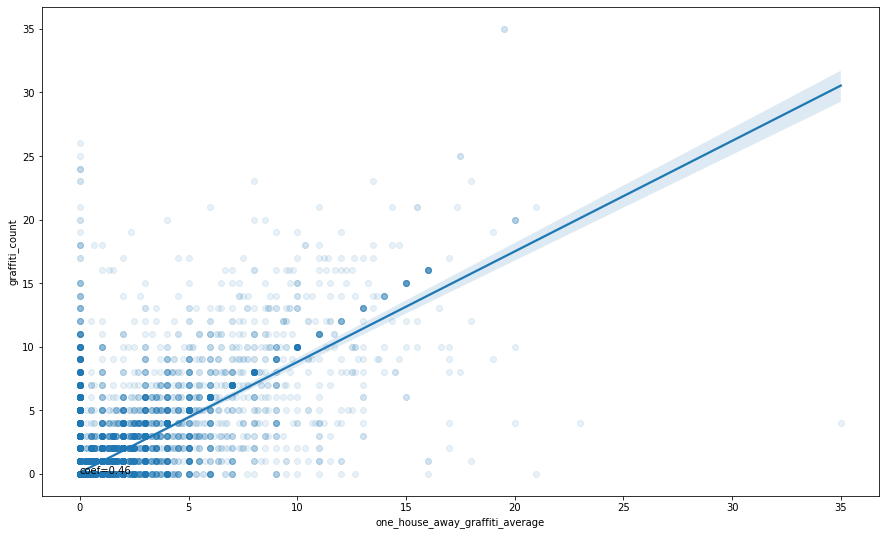

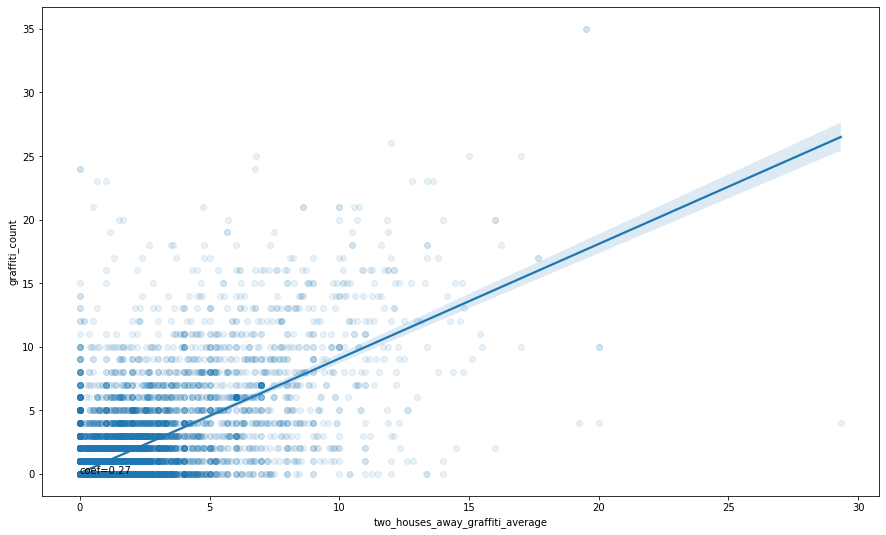

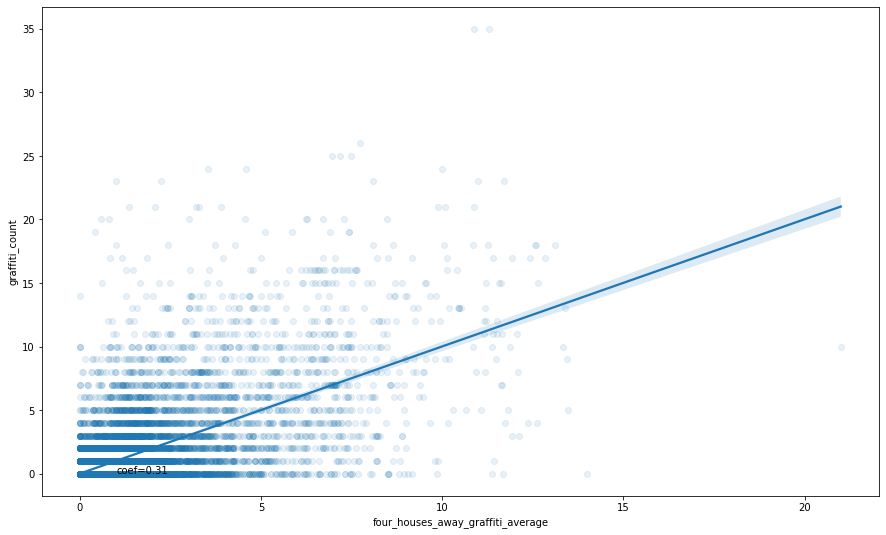

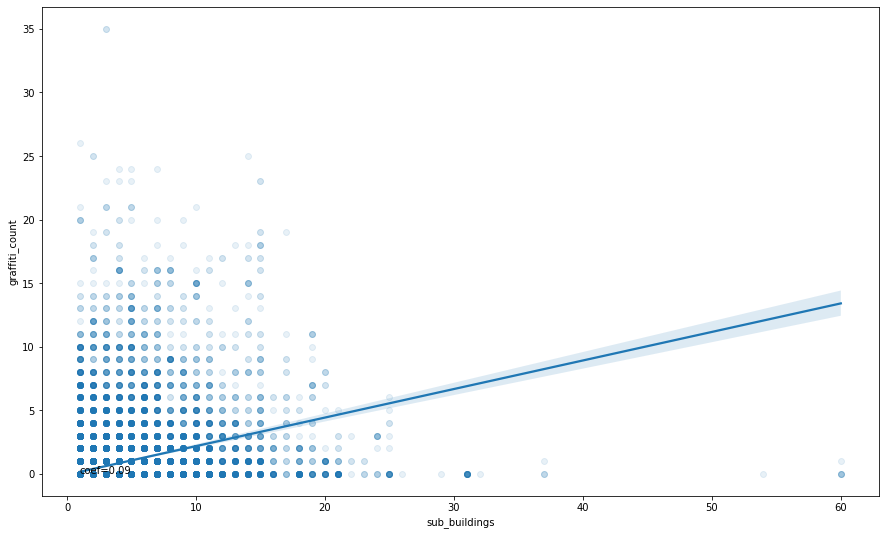

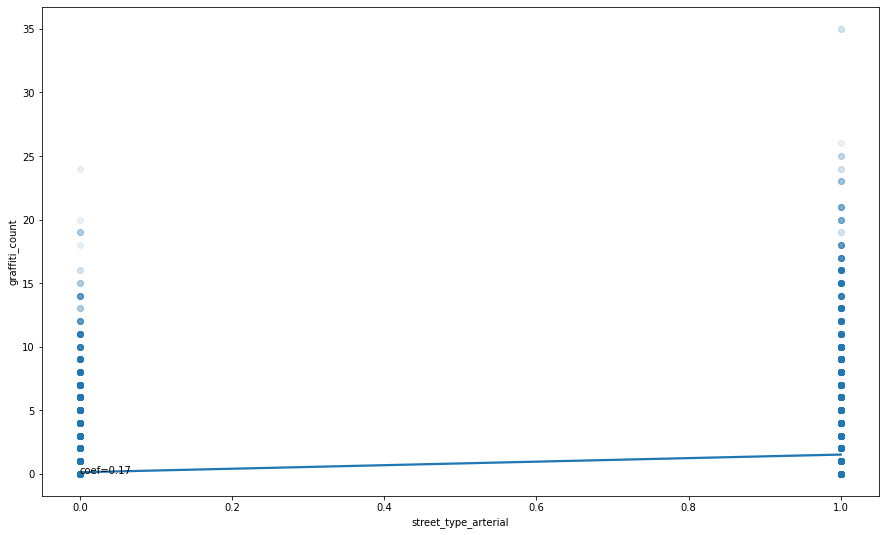

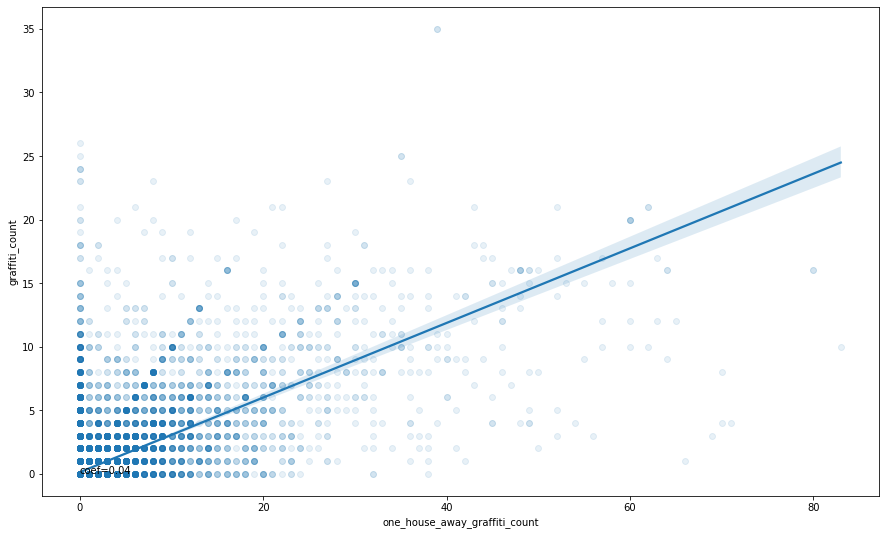

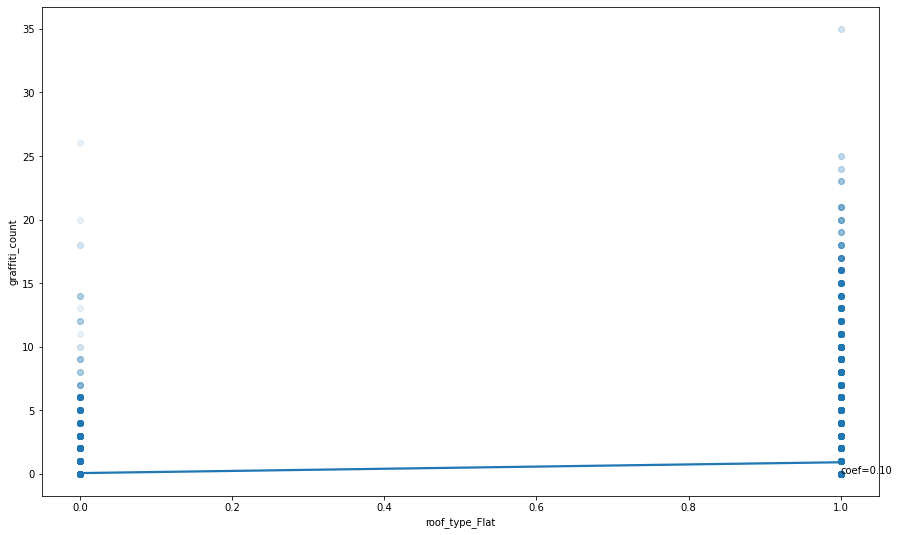

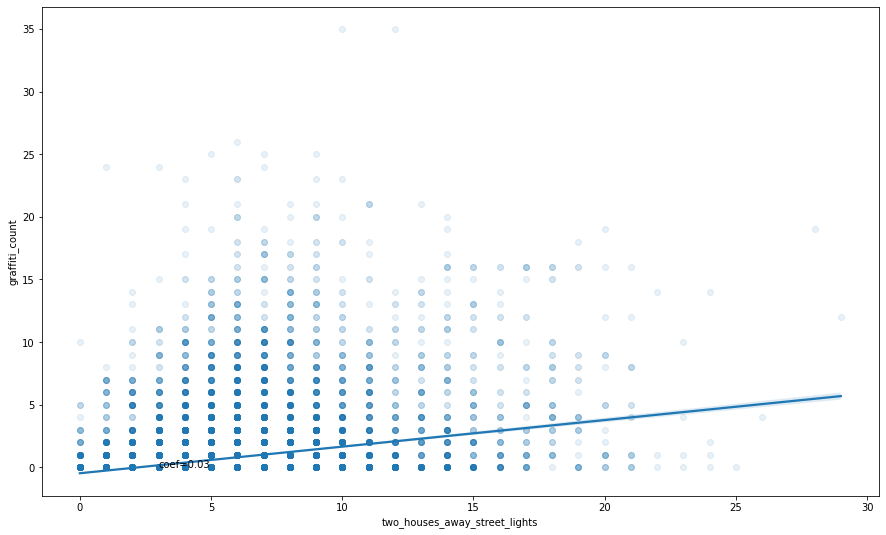

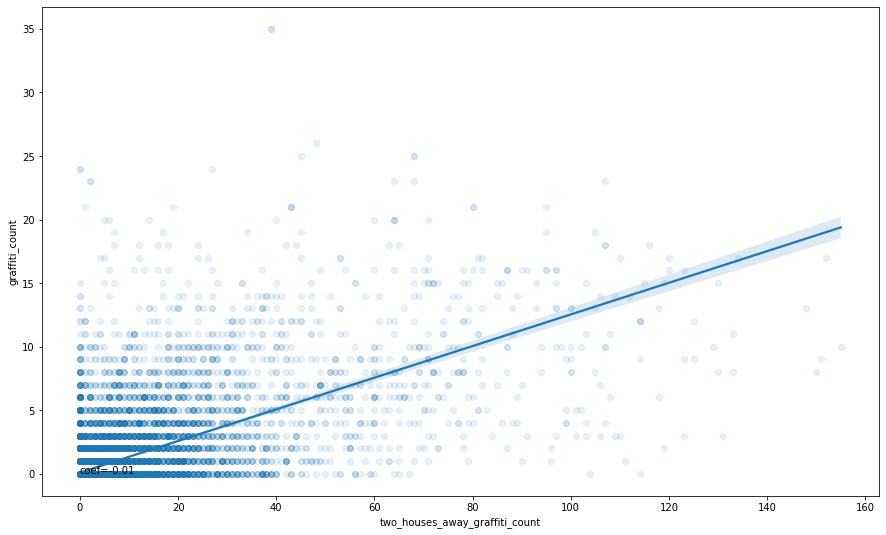

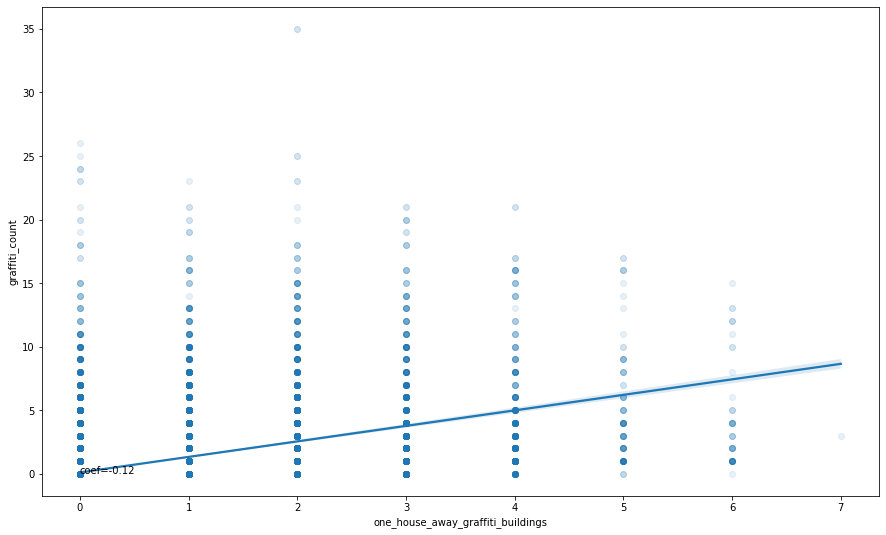

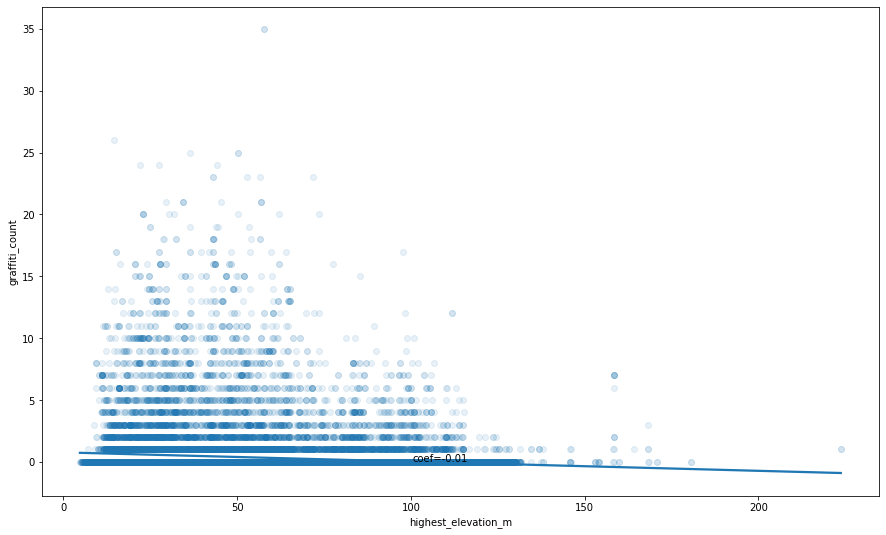

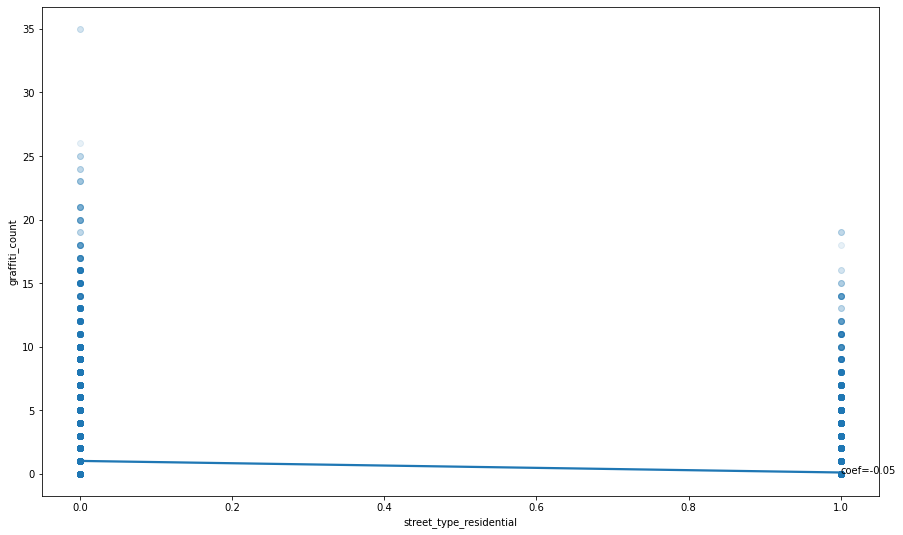

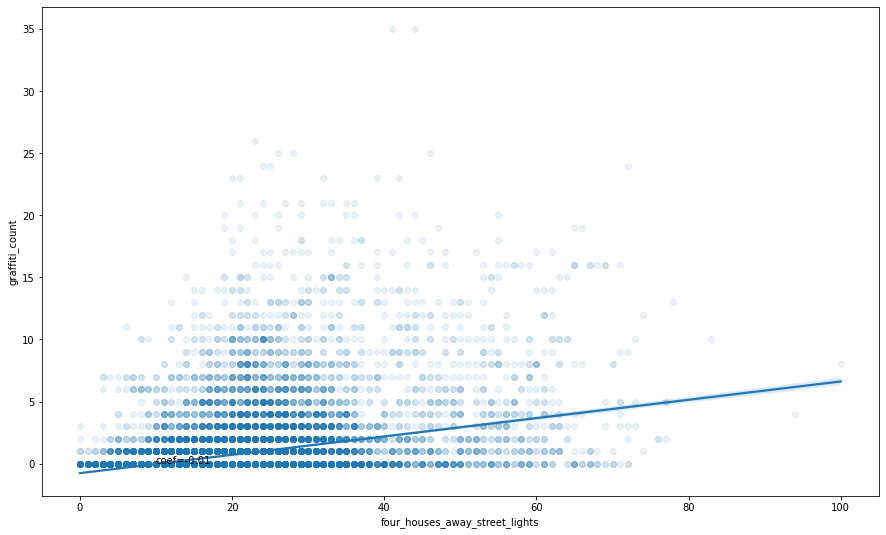

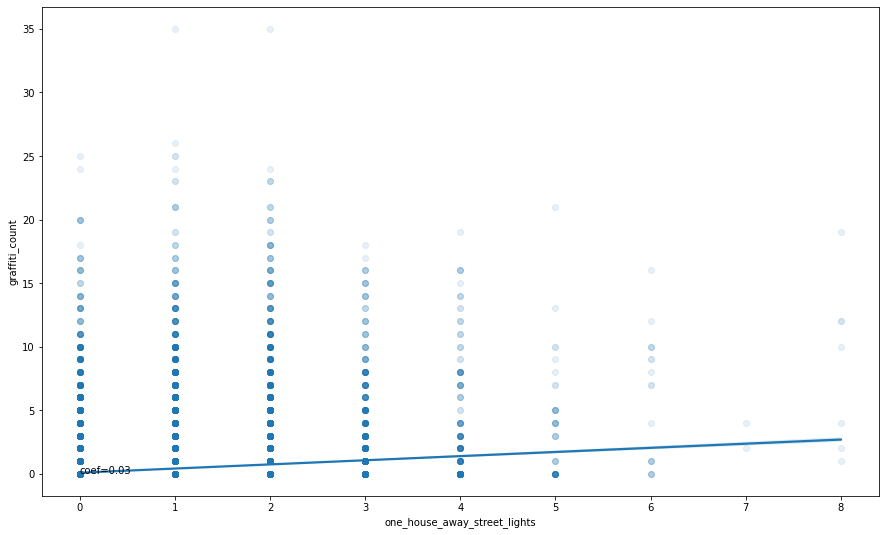

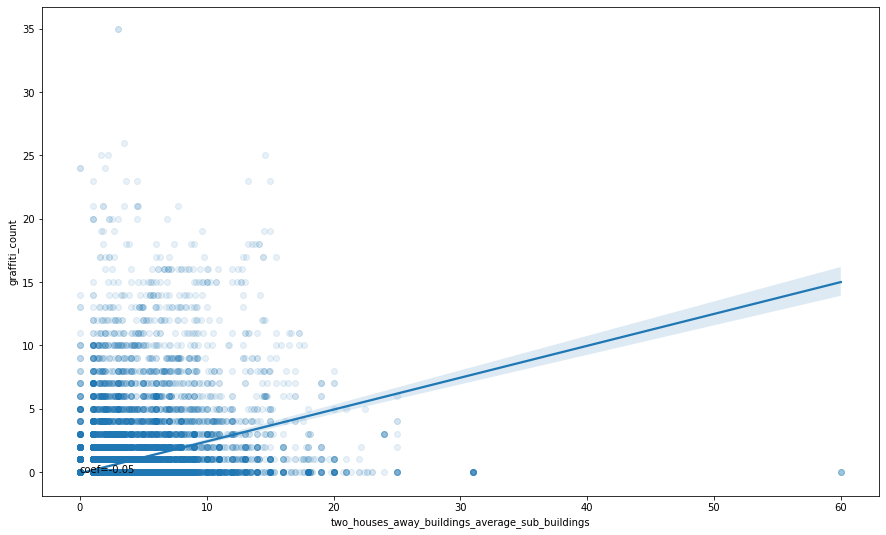

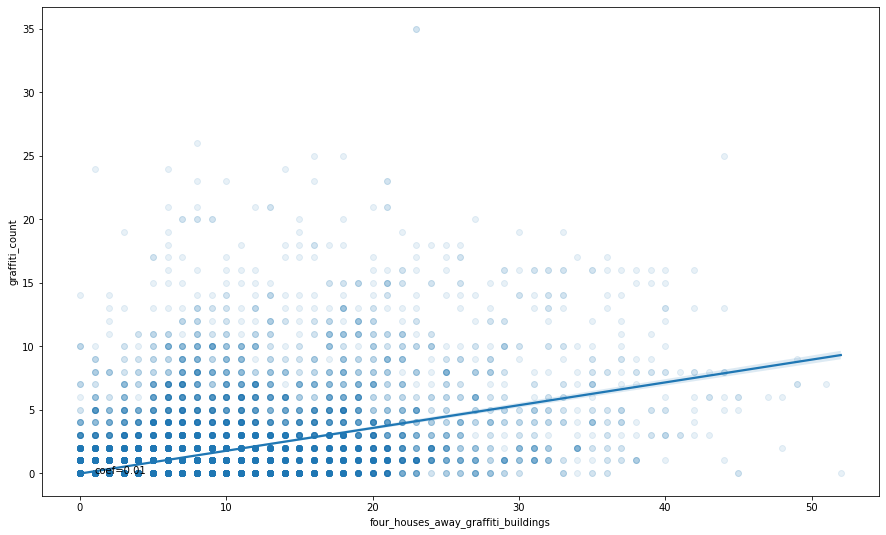

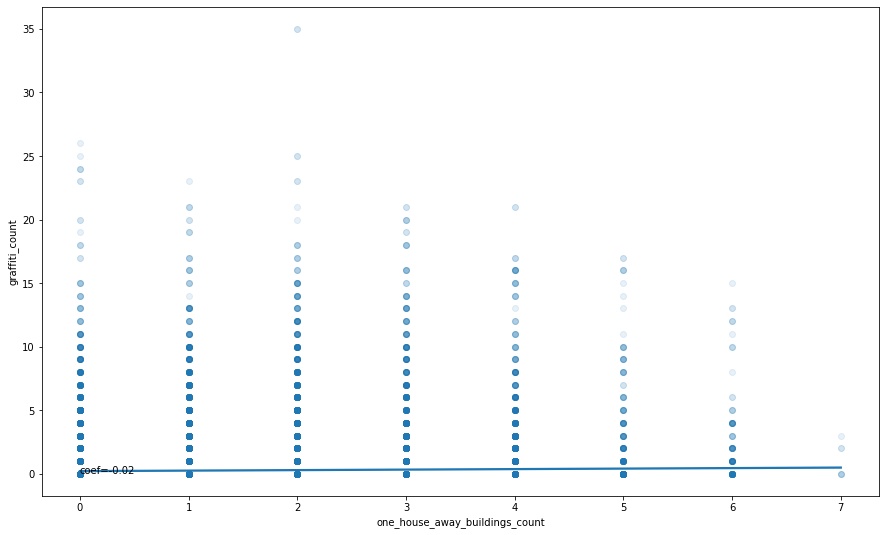

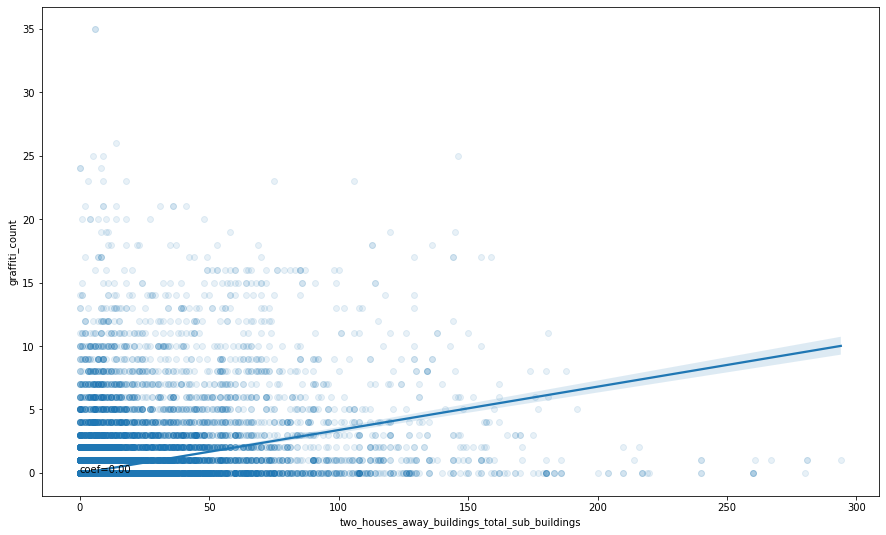

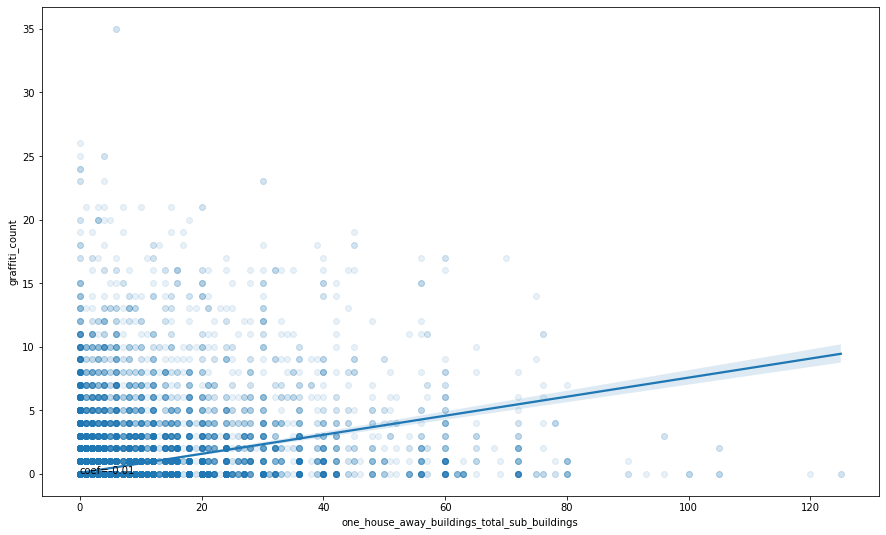

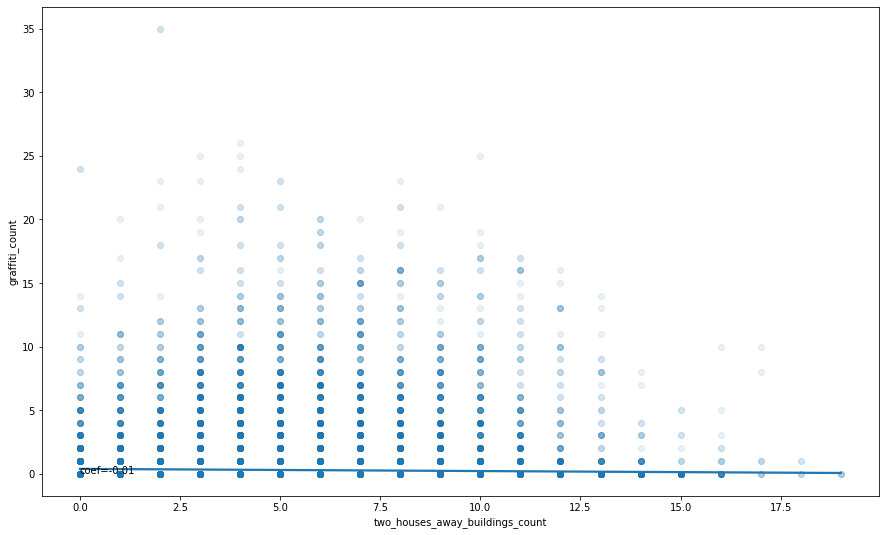

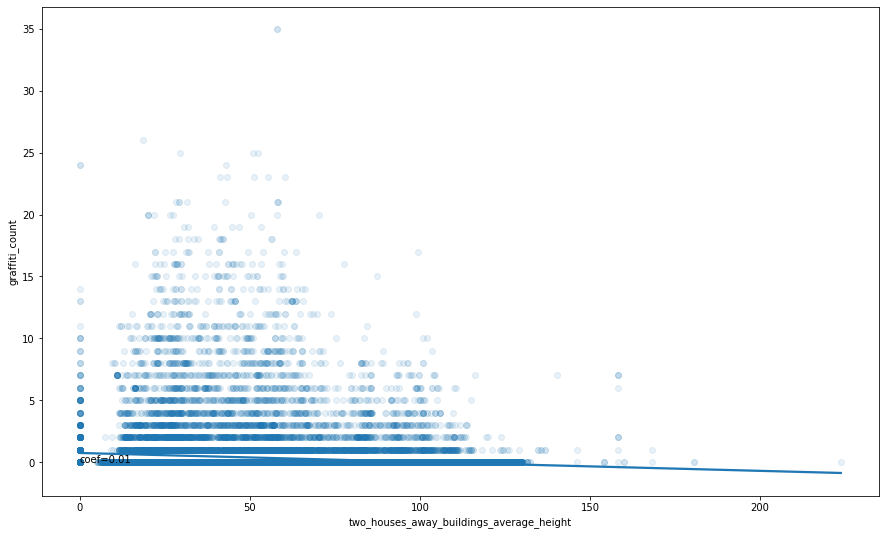

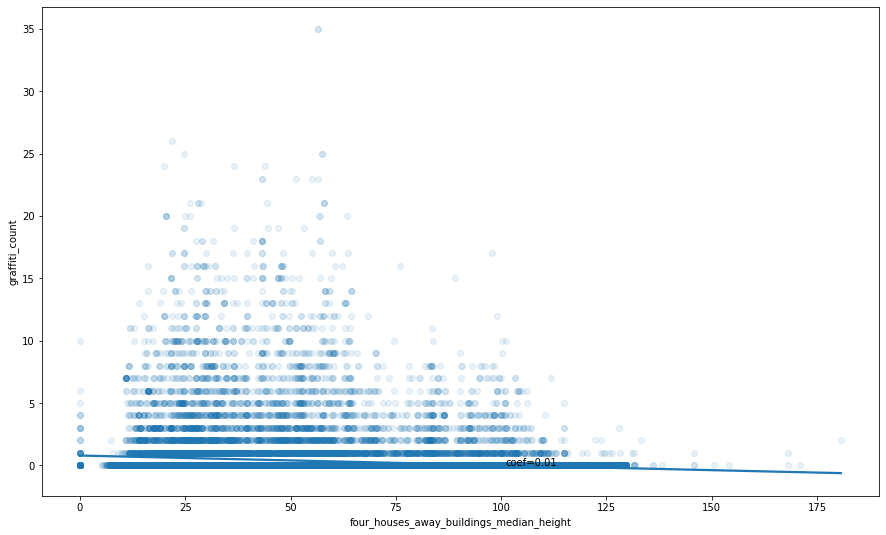

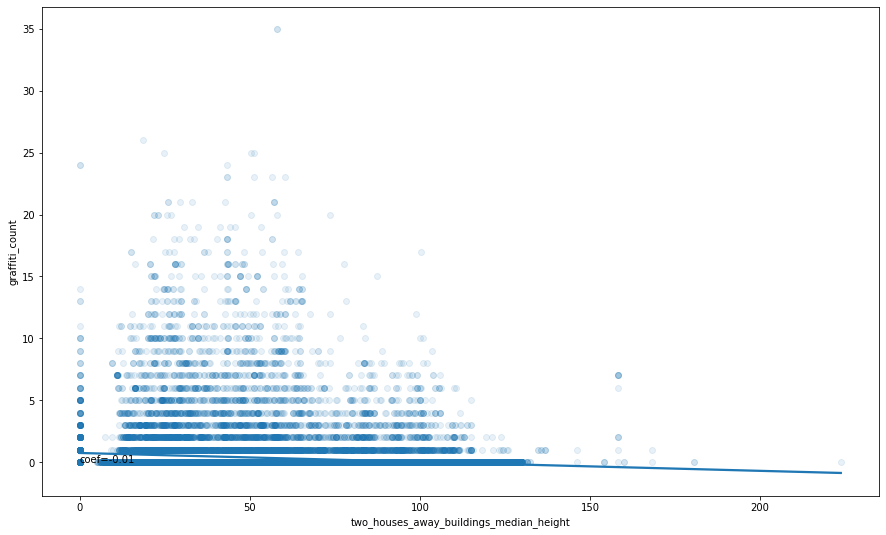

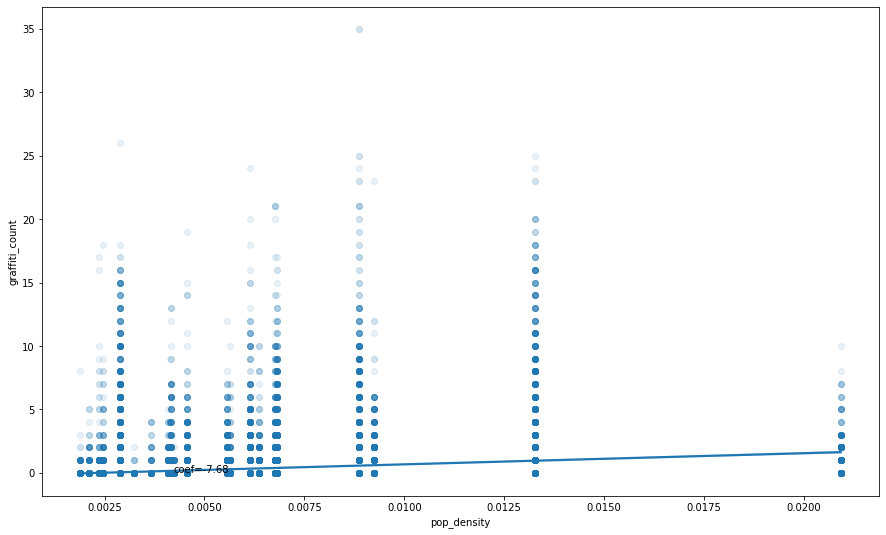

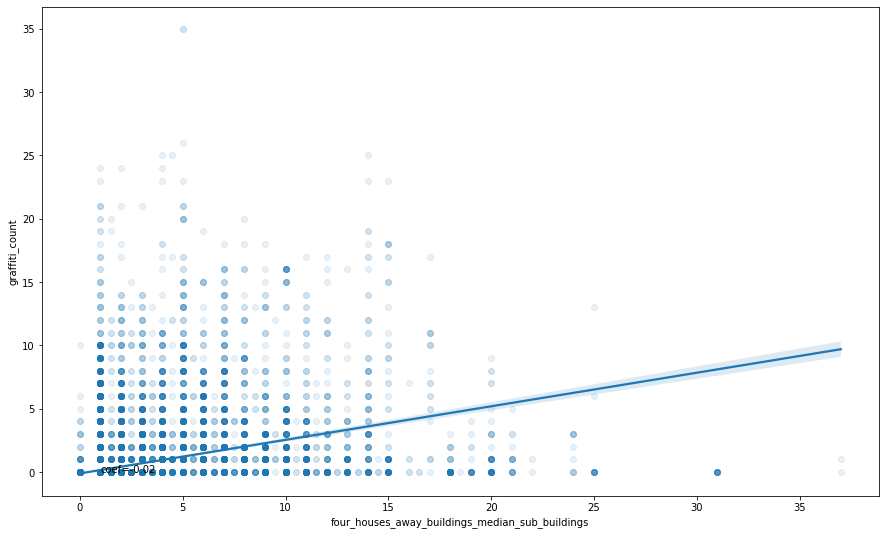

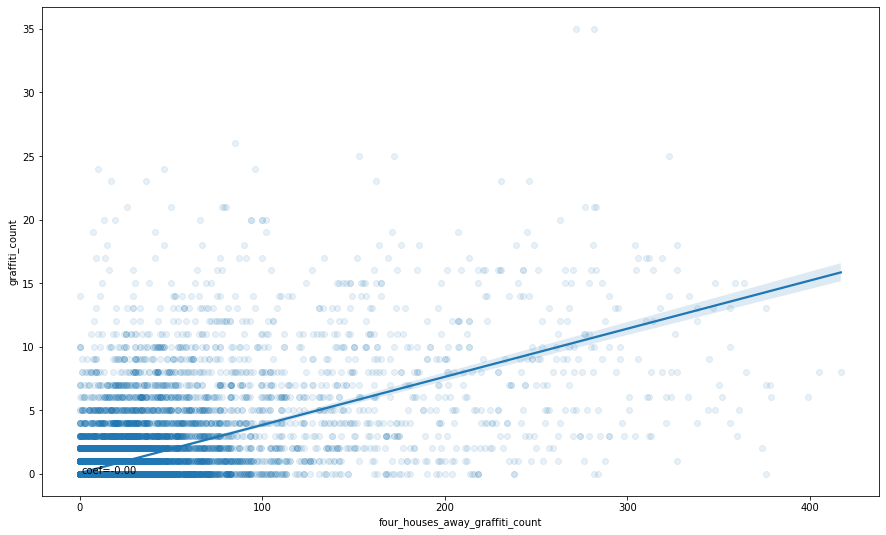

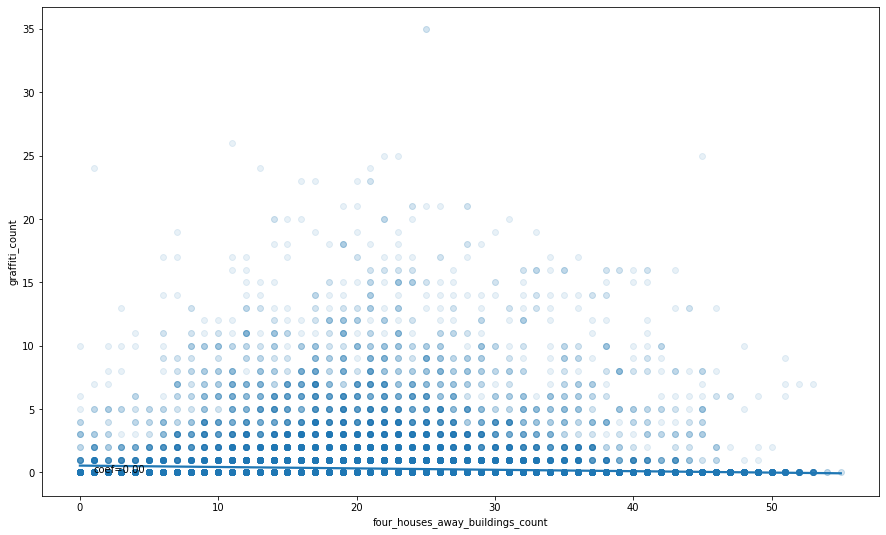

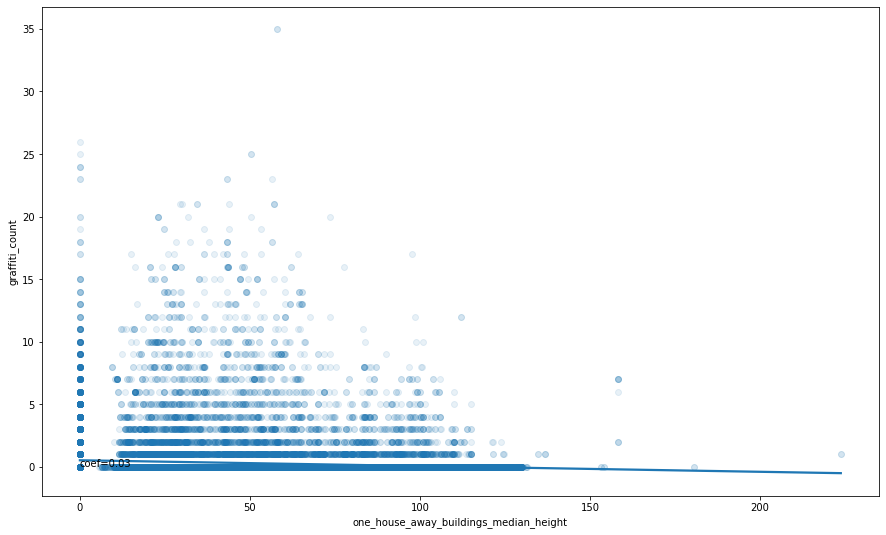

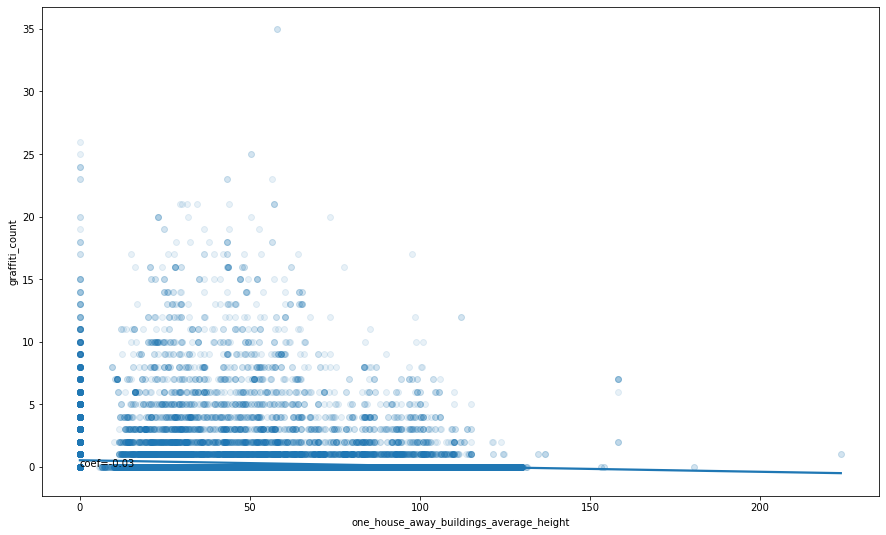

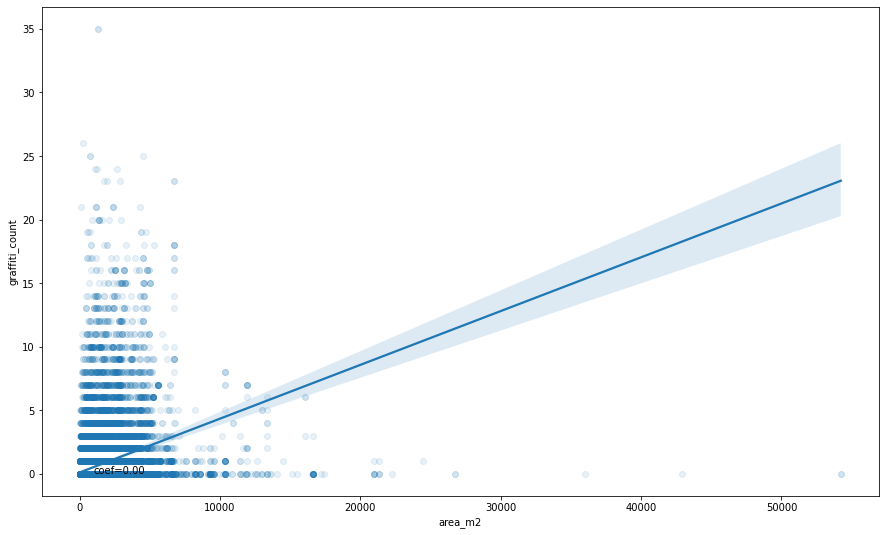

In [6]:
for i, (row_name, column_to_value) in enumerate(df_summary.iterrows()):
    x = list(df[row_name])
    y = list(df['graffiti_count'])
    plt.rcParams["figure.figsize"] = (15,9)
    sns.regplot(robust=False, fit_reg=True, x=row_name, y='graffiti_count', data=df, scatter_kws={'alpha':0.1})
    plt.text(x[-1], y[-1], f'coef={column_to_value["coef"]:.2f}')
    plt.show()

In [7]:
from utils import extract_target_feature
from sklearn.linear_model import LinearRegression

target_value = 'graffiti_count'

df = pd.read_csv('../resources/data/generated/buildings_model_features.csv')
x, y = extract_target_feature(df, target_value)

regressor = LinearRegression()

regressor.fit(x, y)
print(dict(zip(x.columns, regressor.coef_)))

{'highest_elevation_m': -0.005009333064344654, 'area_m2': 1.1080896737332125e-05, 'sub_buildings': 0.09306184328021994, 'one_house_away_buildings_count': -0.022727721709085352, 'one_house_away_graffiti_count': 0.040532942115152966, 'one_house_away_graffiti_average': 0.460451272551692, 'one_house_away_graffiti_buildings': -0.11507994716503223, 'one_house_away_buildings_average_height': -0.03248957526476733, 'one_house_away_buildings_median_height': 0.03314188027549872, 'one_house_away_buildings_total_sub_buildings': -0.00796901321547038, 'one_house_away_buildings_average_sub_buildings': -0.07603623255417755, 'one_house_away_buildings_median_sub_buildings': 0.006565417680619256, 'one_house_away_street_lights': 0.026320128118706095, 'two_houses_away_buildings_count': -0.008458622231525196, 'two_houses_away_graffiti_count': -0.014625459114821198, 'two_houses_away_graffiti_average': 0.2722304185380365, 'two_houses_away_graffiti_buildings': 0.01007573265703272, 'two_houses_away_buildings_ave

In [8]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
from shapely.geometry import shape
import json
import seaborn as sns

colours = sns.color_palette("gray", 10)

vancouver_colour = colours[4]
edge_colour = colours[5]
buildings_colour = colours[7]

width_inches = 300

vancouver = gpd.read_file('../resources/data/original/local-area-boundary.csv')
vancouver['geometry'] = [shape(json.loads(x)) for x in vancouver['Geom']]
buildings \
    = gpd.read_file('../resources/data/generated/buildings_all_features.csv')
buildings['geometry'] \
    = [shape(json.loads(x)) for x in buildings['building_polygon']]

buildings['graffiti_count'] = regressor.predict(x)

# custom colourmap
norm = matplotlib.colors.Normalize(0, buildings['graffiti_count'].max())
colors = [
    [norm(0), buildings_colour],
    [norm(0.99), buildings_colour],
    [norm(1), (246 / 255, 124 / 255, 82 / 255)],
    [norm(buildings['graffiti_count'].max()), "darkred"]
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

fig, ax = plt.subplots()
vancouver.plot(
    ax=ax,
    edgecolor=edge_colour,
    facecolor=vancouver_colour,
    antialiased=True,
)
ax.axis('off)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
buildings = buildings.sort_values('graffiti_count')
buildings.plot(
    ax=ax,
    edgecolor=buildings_colour,
    antialiased=True,
    column='graffiti_count',
    legend=True,
    cmap=cmap,
)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_difference = xlim[1] - xlim[0]
y_difference = ylim[1] - ylim[0]
fig.set_size_inches(width_inches, width_inches / x_difference * y_difference)

plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12840/3348558941.py, line 42)